In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # this module is needed for visualizing data
%matplotlib inline 
import seaborn as sns
import plotly.express as px

In [2]:
# importing our csv file
df = pd.read_csv(r"C:\Users\FAIZAN AHMAD KHAN\Documents\anaconda.python\ML\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv", encoding = "unicode_escape")

In [3]:
# we'll check the number of rows and columns
df.shape 

(11251, 15)

In [4]:
# first five data entries
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
# we should check for the null values and the data type of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# dropping the  unrelated or blank columns 
df.drop(["Status", "unnamed1"], axis = 1, inplace = True)

In [7]:
df.shape

(11251, 13)

In [8]:
# now checking if the data has any null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# as there are some null values we should drop them
df.dropna(inplace = True)

In [10]:
# change the data type
df["Amount"] = df["Amount"].astype("int")

In [11]:
df["Amount"].dtypes

dtype('int32')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
# we can also use describe() for specific columns also
df[["Age", "Orders", "Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

### Gender

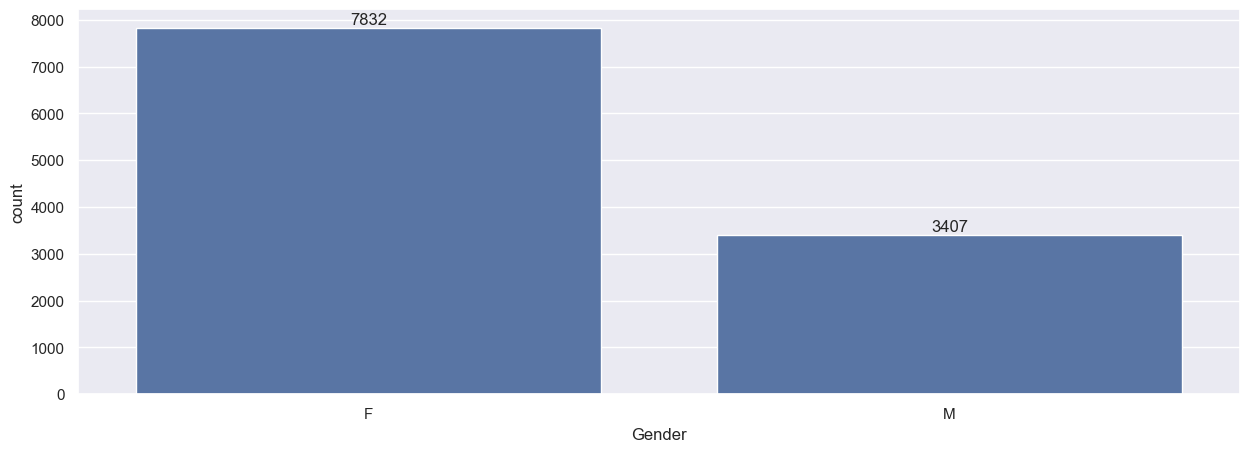

In [39]:
# plotting a bar chart for Gender and it's count
G = sns.countplot(x = "Gender", data = df)

for bars in G.containers:
    G.bar_label(bars)

plt.show()

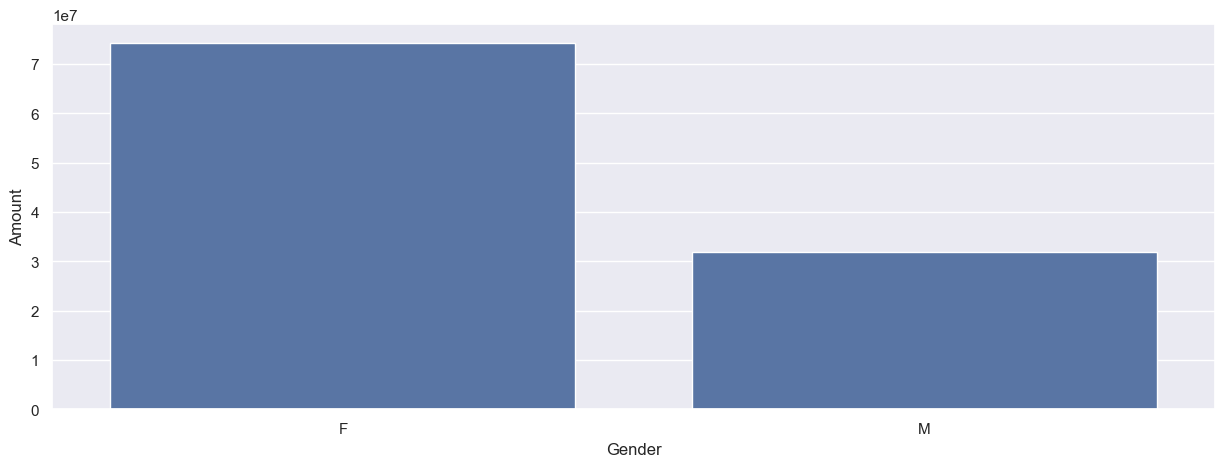

In [38]:
# plotting a bar chart for gender vs total amount
sales_gen = df.groupby(["Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)
sns.barplot(x = "Gender", y = "Amount", data = sales_gen)
plt.show()

#### *From the above graph we can see that most of the buyers are females and the purchasing power of females is greater than man.*

## Age

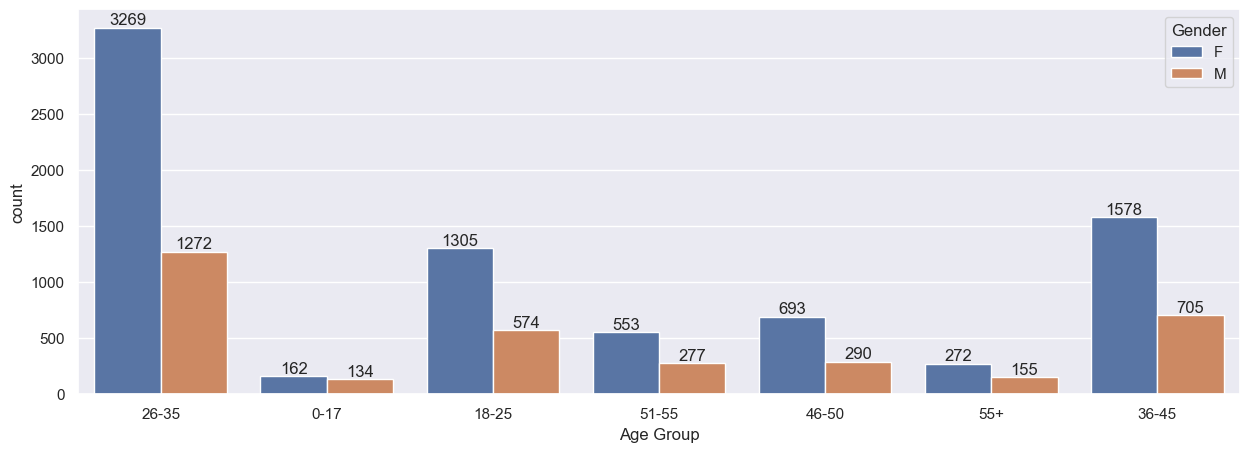

In [37]:
ag = sns.countplot(data = df, x = "Age Group", hue = "Gender")

for bars in ag.containers:
    ag.bar_label(bars)

plt.show()

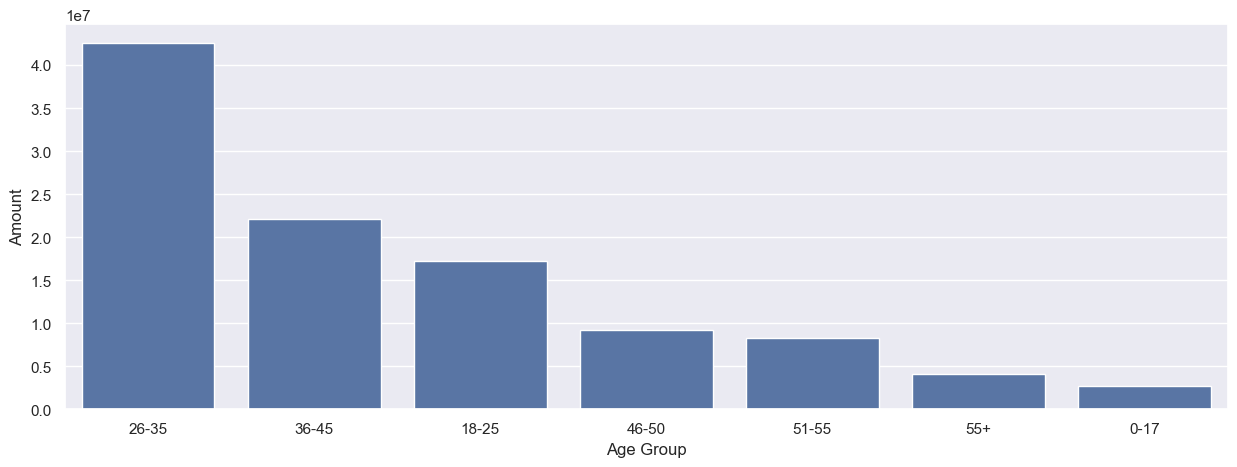

In [36]:
# Total amount vs Age Group
sales_age = df.groupby(["Age Group"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.barplot(x = "Age Group", y = "Amount", data = sales_age)

plt.show()

#### *From the above graph we can see that most of the buyers are of age group between 26-35 yrs.*

## State 

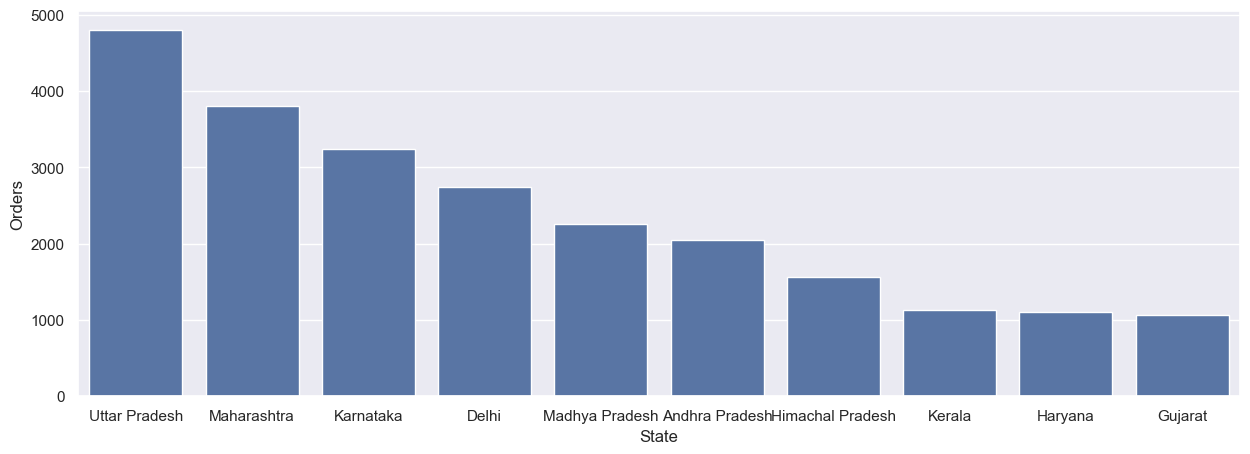

In [35]:
# total number of orders from top 10 states
sales_state = df.groupby(["State"], as_index = False)["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)

sns.set(rc= {"figure.figsize":(15,5)})
sns.barplot(data = sales_state, x = "State", y = "Orders")

plt.show()


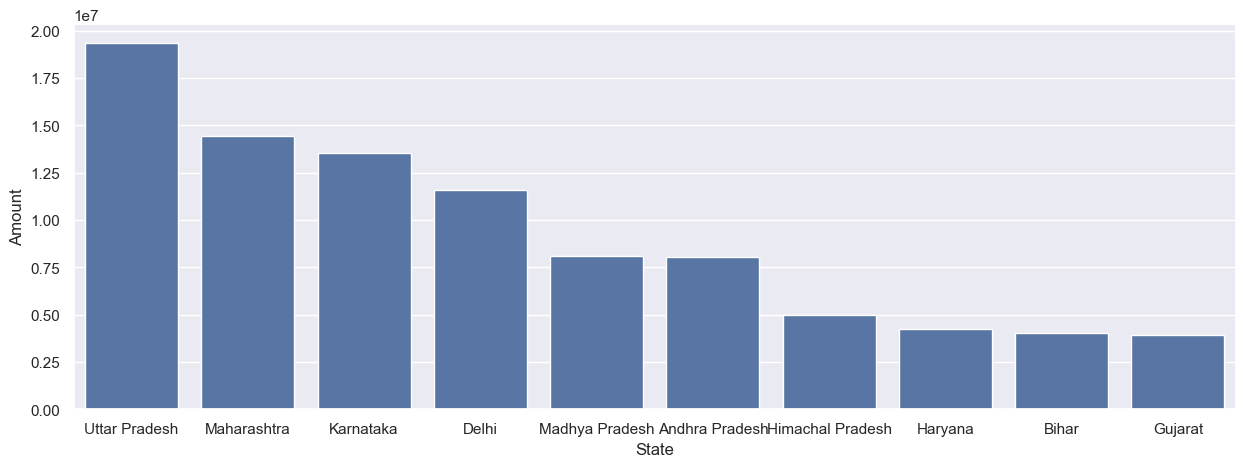

In [34]:
# total sales from the top 10 states

sales_state = df.groupby(["State"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

sns.set(rc = {"figure.figsize":(15,5)})
sns.barplot(data = sales_state, x = "State" , y = "Amount")
plt.show()

#### *From above graphs we can see that most of the orders & total sales are from Uttar Pradesh, Maharashtra and Karnataka respectively.*

## Marital Status

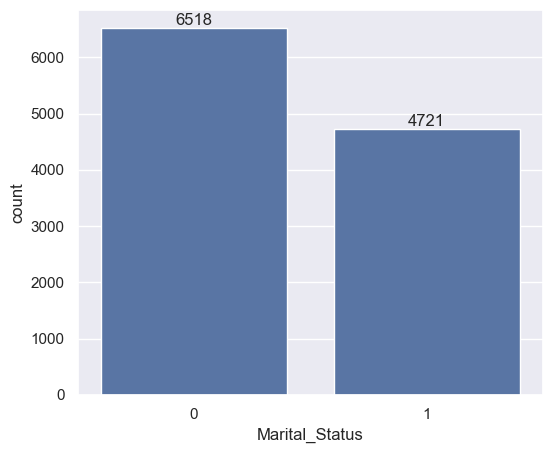

In [33]:
ms = sns.countplot(data = df, x = "Marital_Status")

sns.set(rc = {"figure.figsize":(7,5)})
for bars in ms.containers:
    ms.bar_label(bars)

plt.show()

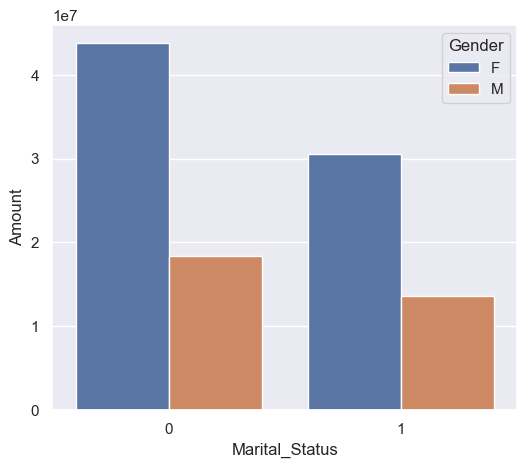

In [32]:
sales_ms = df.groupby(["Marital_Status", "Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set(rc = {"figure.figsize":(6,5)})
sns.barplot(data = sales_ms, x = "Marital_Status", y = "Amount", hue = "Gender")

plt.show()

#### *From above graphs we can see that most of the buyers are married(women) and they have high purchasing power*

## Occupation

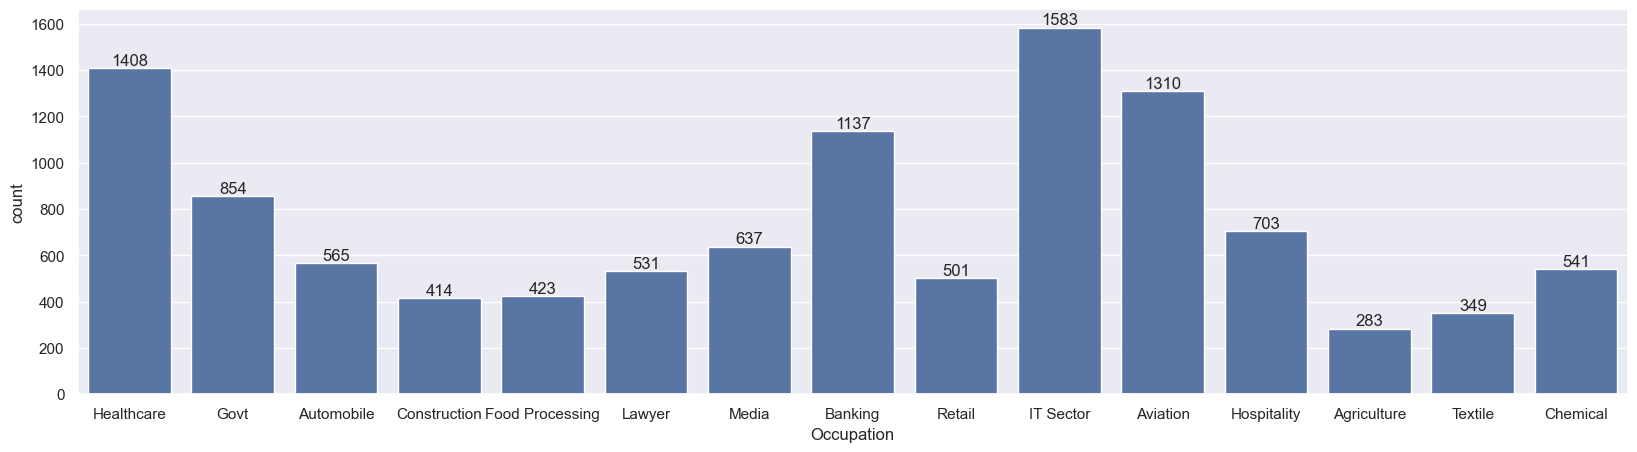

In [31]:
sns.set(rc = {"figure.figsize":(20,5)})
oc = sns.countplot(data = df, x = 'Occupation')

for bars in oc.containers:
    oc.bar_label(bars)

plt.show()

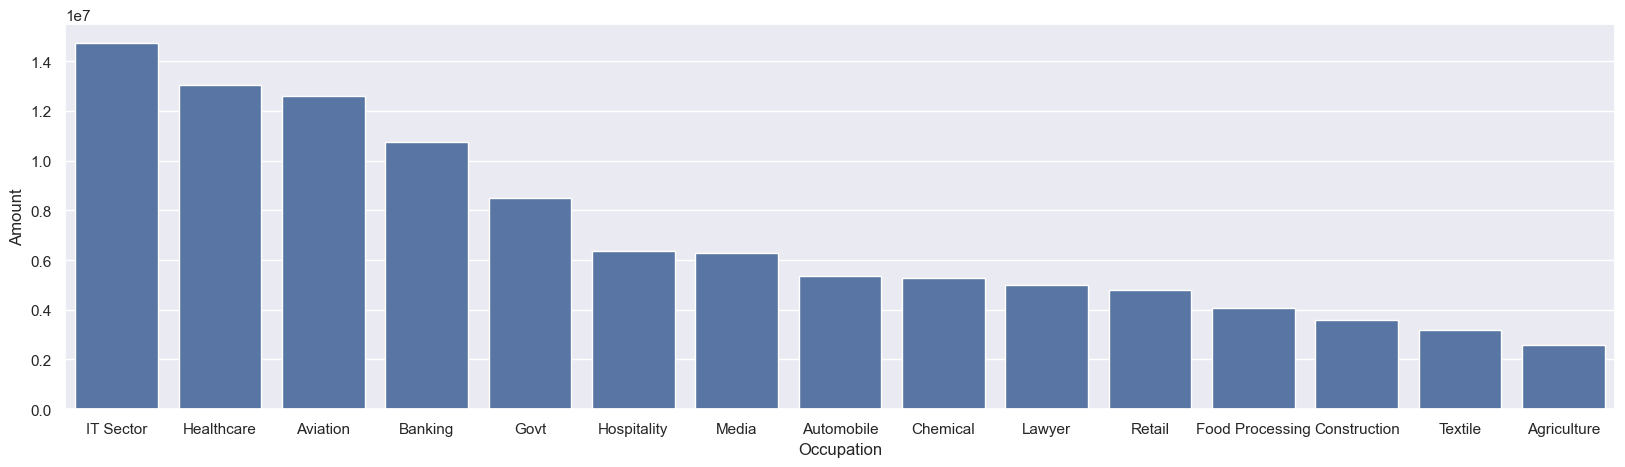

In [30]:
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_occupation, x = 'Occupation',y= 'Amount')

plt.show()

#### *From the above graphs we can see that most of the buyers re working in IT, Healthcare and Aviation sector.*

## Product Category

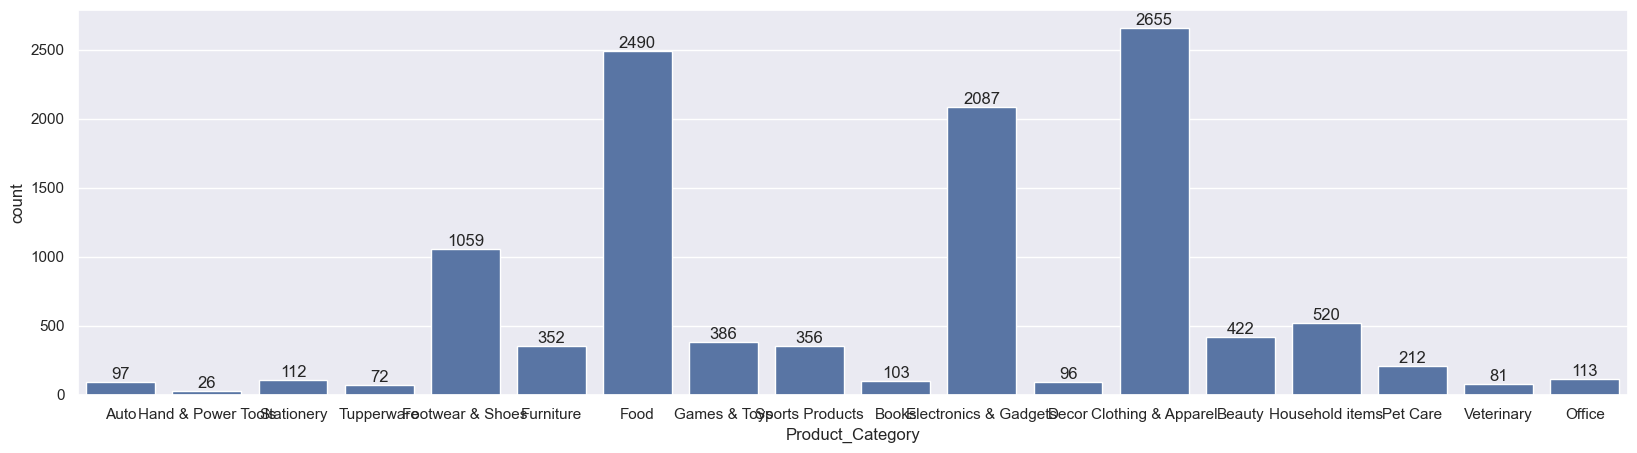

In [29]:
sns.set(rc={'figure.figsize':(20,5)})
pc = sns.countplot(data = df, x = 'Product_Category')

for bars in pc.containers:
    pc.bar_label(bars)

plt.show()

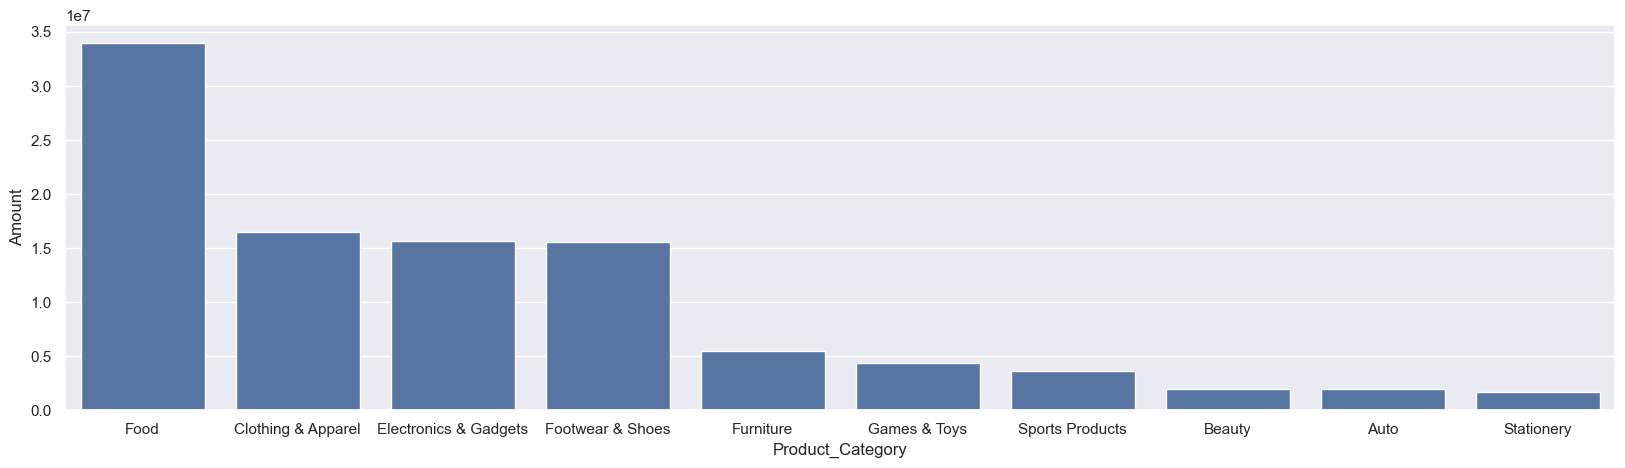

In [28]:
sales_Product_Category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_Product_Category, x = 'Product_Category',y= 'Amount')

plt.show()

#### *From the above graphs we can see that most of the sold products are from Food, Clothing and Electronics category.*

## **Conclusion:-**

 *Married women within age group 26-35 years from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation industries are more likely to buy products from Food, Clothing and Electronics category*